In [1]:
import numpy as np
import pandas as pd

np.random.seed(1234)

n_samples = 100

x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)
x3 = np.random.randn(n_samples)

# 임의의 계수
a, b, c, d = 2.0, -1.5, 3.0, 5.0

# 종속 변수 생성 + noise
noise = np.random.randn(n_samples) * 0.5
y0 = a * x1 + b * x2 + c * x3 + d + noise

df = pd.DataFrame({'X1': x1, 'X2': x2, 'X3': x3, 'Y': y0})
df.head()

,X1,X2,X3,Y
0,0.471435,0.291205,-0.319561,4.810901
1,-1.190976,0.566534,-0.619993,0.263825
2,1.432707,0.503592,0.156998,7.472249
3,-0.312652,0.285296,-0.571455,3.551282
4,-0.720589,0.484288,1.057633,5.134221


In [2]:
from sklearn.model_selection import train_test_split

X = df[['X1', 'X2', 'X3']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [3]:
from sklearn.linear_model import Ridge, Lasso, LassoLars

# Ridge 모델 학습, L2 정규화
ridge = Ridge(random_state=1234)
ridge.fit(X_train, y_train)

print("Intercept (절편):", ridge.intercept_)
print("Coefficients (계수):", ridge.coef_)

Intercept (절편): 5.067887852086875
Coefficients (계수): [ 1.93240891 -1.55096515  2.90693538]


In [4]:
# 예측
y_pred = ridge.predict(X_test)
y_pred

array([ 3.17668566,  7.04918039, -0.81677053,  6.68285175, -1.96056385,
        2.58802063,  5.65814372,  1.76719776,  9.75419023,  6.55695311,
        1.99976668,  5.24445869,  8.60489521,  5.02574345,  6.60719873,
       13.08665584,  4.50466105,  0.08548194,  4.89549765,  0.08753902])

In [5]:
# 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, mae, r2

(0.13147636881405128, 0.2901602983157575, 0.9901169545112554)

# Lasso 모델 학습, L1 정규화
## 비용 함수는 절댓값 때문에 좌표 하강법으로 최적화
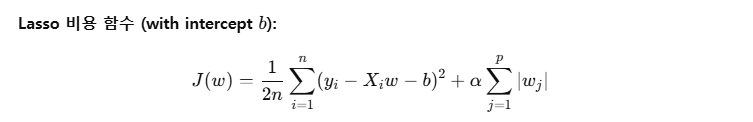

In [ ]:
lasso = Lasso(random_state=1234)
lasso.fit(X_train, y_train)

print("Intercept (절편):", lasso.intercept_)
print("Coefficients (계수):", lasso.coef_)

In [7]:
# 예측
y_pred = lasso.predict(X_test)
y_pred

array([4.99848947, 6.10228749, 3.26377927, 6.01091275, 2.69503885,
       4.74853271, 5.32209709, 4.41989748, 7.58347328, 6.56371731,
       4.63685494, 5.32145464, 6.88319444, 5.78297138, 5.23136772,
       8.78030784, 5.32596062, 3.8217066 , 5.09170193, 2.9689345 ])

In [8]:
# 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, mae, r2

(5.696902714648381, 1.9336190783936786, 0.5717652595543412)

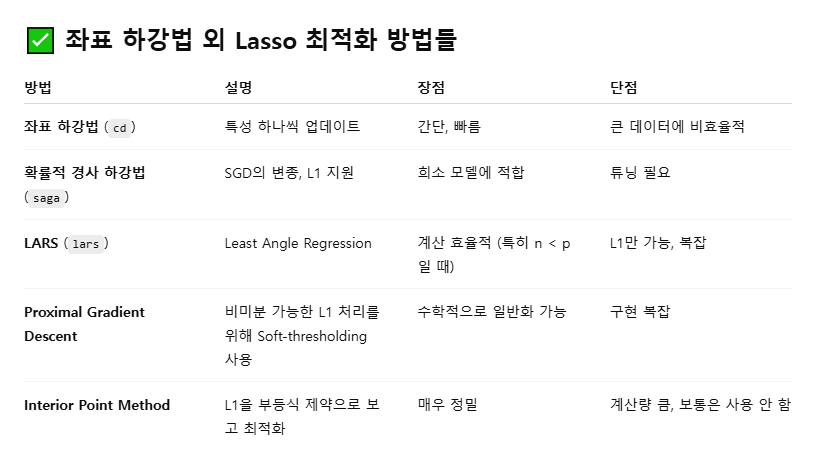

In [ ]:
# Lasso -> 기본 solver='cd'
# SGDRegressor -> with L1 penalty (saga)
# LassoLars -> Least Angle Regression
# Proximal Gradient Descent -> 미제공
# Interior Point Method -> 미제공

In [9]:
# LassoLars 모델 학습, L1 정규화 + Least Angle Regression 기반의 Lasso
# 최소 각도 회귀 = Least Angle Regression
# 선형 회귀에서 변수를 단계적으로 추가하는 방식
# 매 단계마다 가장 상관관계가 높은 변수를 선택하되, 각 변수의 기여가 균형을 이루도록 각도를 "최소화"하면서 계수를 조절
lassoLars = LassoLars()
lassoLars.fit(X_train, y_train)

print("Intercept (절편):", lassoLars.intercept_)
print("Coefficients (계수):", lassoLars.coef_)

Intercept (절편): 5.932382244041056
Coefficients (계수): [0. 0. 0.]


In [10]:
# 예측
y_pred = lassoLars.predict(X_test)
y_pred

array([5.93238224, 5.93238224, 5.93238224, 5.93238224, 5.93238224,
       5.93238224, 5.93238224, 5.93238224, 5.93238224, 5.93238224,
       5.93238224, 5.93238224, 5.93238224, 5.93238224, 5.93238224,
       5.93238224, 5.93238224, 5.93238224, 5.93238224, 5.93238224])

In [11]:
# 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, mae, r2

(15.29213668941544, 3.1473843704206095, -0.14950605865410949)

In [12]:
# Lasso lambda 변경
for ld in [0.1, 0.5, 1, 2, 5]:
    lasso_ld = Lasso(alpha=ld, random_state=1234)
    lasso_ld.fit(X_train, y_train)
    
    y_pred = lasso.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("lambda :", ld, mse, mae, r2)


lambda : 0.1 5.696902714648381 1.9336190783936786 0.5717652595543412
lambda : 0.5 5.696902714648381 1.9336190783936786 0.5717652595543412
lambda : 1 5.696902714648381 1.9336190783936786 0.5717652595543412
lambda : 2 5.696902714648381 1.9336190783936786 0.5717652595543412
lambda : 5 5.696902714648381 1.9336190783936786 0.5717652595543412


In [14]:
Lasso?